<a href="https://colab.research.google.com/github/ginttone/multi_deeplearning/blob/master/Nomal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATASET

[Dataset-boston house](https://datasetsearch.research.google.com/)

[Tensorflow Dataset](https://www.tensorflow.org/datasets/catalog/overview#all_datasets)


seed 는 딥러닝이나 sklearn으로 머신 돌릴 때 

결과 값이나 loss값의 수치를 똑같이 나오게 하기위해 멈춰둔다(말뚝역할) 

```
tf..keras.datasets.boston_housing.load_data(
  path='boston_housing.npz', test_split=0.2 ,seed=113
)
```

어떤 모델이나 데이터 수정해서 변경된 결과값을 보기 때문에 이전 layer와 값을 비교할때 쓰려고 seed쓴다


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data

In [2]:
(x_train, y_train), (x_test,y_test)=load_data(path='boston_housing.npz', test_split=0.2 ,seed=113)

x_train.shape, y_train.shape, x_test.shape,y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [3]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

## MODEL

In [4]:
model = tf.keras.models.Sequential()

행의 갯수는 계속해서 변화하기 때문에 빼는 것

컬럼은 불변이니까 쓰는 것

y_train 이  연속형 / regression 그래서 아웃풋 dense가 1개 

In [5]:
model.add(tf.keras.Input(shape=(13))) 
model.add(tf.keras.layers.Dense(64, activation='sigmoid')) 
model.add(tf.keras.layers.Dense(1,)) 

model.compile(optimizer='sgd', loss='mse')

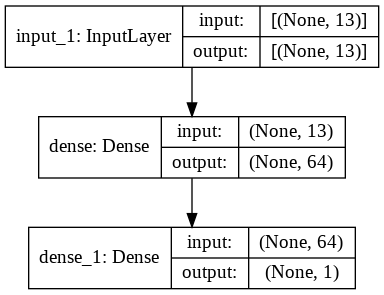

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(x_train, y_train)

13/13 [==============================] - 0s 2ms/step - loss: 127.6434


## Evaluation


In [9]:
model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 1ms/step - loss: 80.4230


80.42301177978516

## Service

In [10]:
x_test[10]

array([2.2876e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
       6.4050e+00, 8.5400e+01, 2.7147e+00, 5.0000e+00, 3.8400e+02,
       2.0900e+01, 7.0800e+01, 1.0630e+01])

In [11]:
model.predict([[2.2876e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
       6.4050e+00, 8.5400e+01, 2.7147e+00, 5.0000e+00, 3.8400e+02,
       2.0900e+01, 7.0800e+01, 1.0630e+01]])

array([[20.752325]], dtype=float32)